In [34]:
#!C:\Users\misra\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip

In [35]:
#!py -m pip install numpy

In [36]:
#!py -m pip install pandas

In [37]:
#!py -m pip install matplotlib

#Steps to be followed after reading the training csv data file: 
# S1. Data cleaning
# S2. EDA (Exploratory Data Analysis)
# S3. Text Pre-Processing
# S4. Model Development
# S5. Improvement
# S6. Evaluation

In [39]:
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [41]:
df.shape

(5572, 5)

In [42]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1121,spam,Do you want 750 anytime any network mins 150 t...,NaN,NaN,NaN
5489,ham,Oh thanks a lot..i already bought 2 eggs ..,NaN,NaN,NaN
2199,ham,Not sure I have the stomach for it ...,NaN,NaN,NaN
1389,ham,"Haha... Where got so fast lose weight, thk muz...",NaN,NaN,NaN
4927,ham,Just hopeing that wasnÛ÷t too pissed up to re...,NaN,NaN,NaN
400,spam,FREE RINGTONE text FIRST to 87131 for a poly o...,NaN,NaN,NaN
734,ham,Leaving to qatar tonite in search of an opport...,NaN,NaN,NaN
236,ham,Or ill be a little closer like at the bus stop...,NaN,NaN,NaN
2051,ham,Hey darlin.. i can pick u up at college if u t...,NaN,NaN,NaN
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [44]:
#columns removal and renaming
cols_lst = ['v1','v2']
df=df[cols_lst]
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(4)

,target,text
445,ham,"Sorry, my battery died, I can come by but I'm ..."
440,ham,Yes..he is really great..bhaji told kallis bes...
3866,ham,"Alright we're hooked up, where you guys at"
4650,spam,A å£400 XMAS REWARD IS WAITING FOR YOU! Our co...


In [30]:
# !py -m pip install scikit-learn

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [45]:
#replacing ham and spam with 0 & 1 respectively
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
#checking missing and duplicate values
df.isnull().sum()
df.duplicated().sum()

403

In [47]:
#duplicate removal
df = df.drop_duplicates(keep='first')
print(df.duplicated().sum())
df.shape

0


(5169, 2)

# EDA

In [48]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

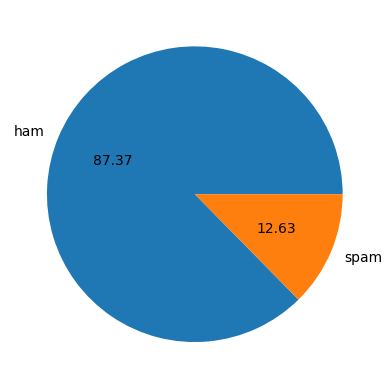

In [49]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [51]:
# #date imbalanced
# !py -m pip install nltk

In [52]:
import nltk

In [53]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\misra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [55]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [56]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [57]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [61]:
# !py -m pip install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 325.1 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.6 kB 901.1 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.6 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.5 MB/s eta 0:00:00


In [62]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

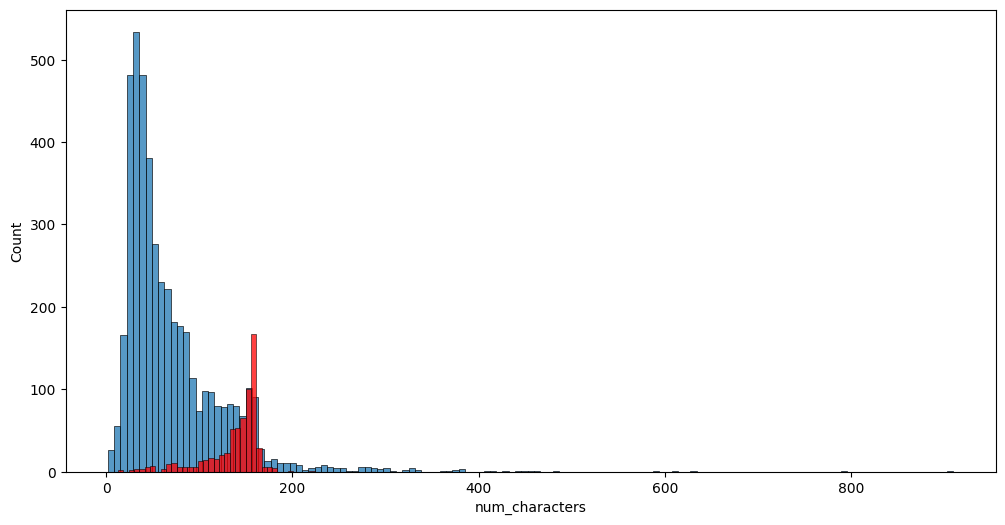

In [63]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

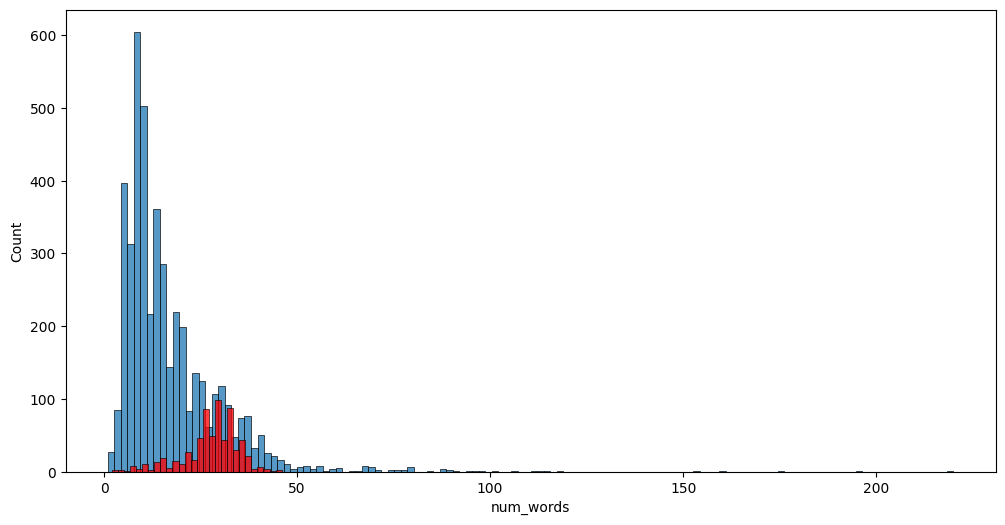

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

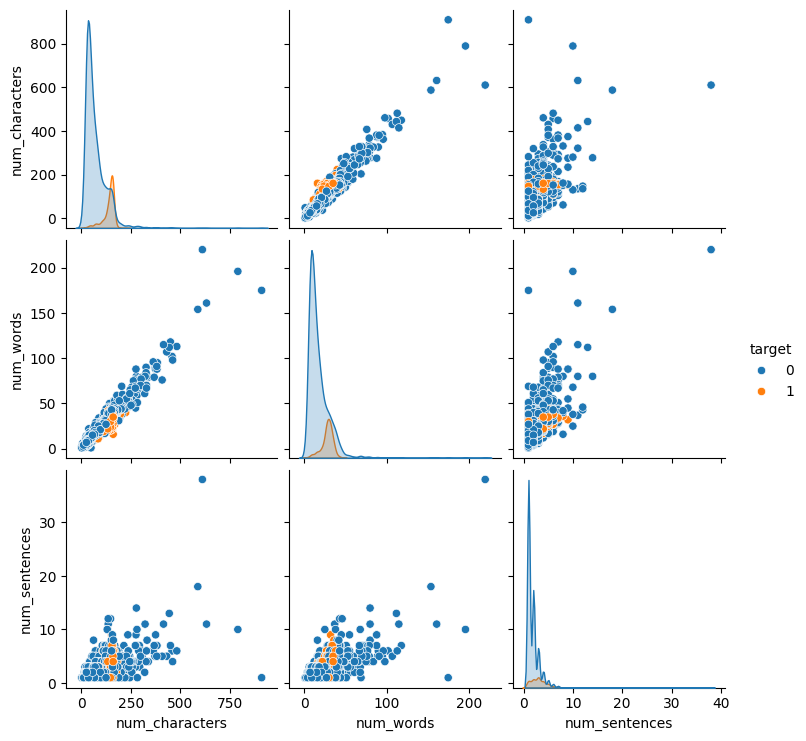

In [65]:
sns.pairplot(df,hue='target')

<Axes: >

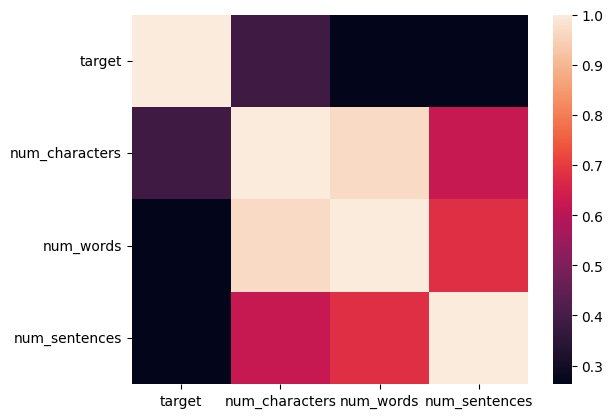

In [80]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr)

## 3. Data PreProcessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [94]:
# !py -m pip install nltk corpus

In [99]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\misra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [111]:
from nltk.corpus import stopwords
import string 

In [112]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [114]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [115]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [117]:
transform_text(df['text'][7])

'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun'

In [118]:
df['transformed_text'] = df['text'].apply(transform_text)

In [128]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [159]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)        

9939

In [162]:
# !py -m pip install collection

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5111 sha256=f81a9fa83e401d355e855773c7e806b9072916128a97708b58dc09a303d44c7d
  Stored in directory: c:\users\misra\appdata\local\pip\cache\wheels\1c\b3\7a\6dd2fd1aa32817819c8c91da9a6b5919148da6eb5855ab0986
Successfully built collection


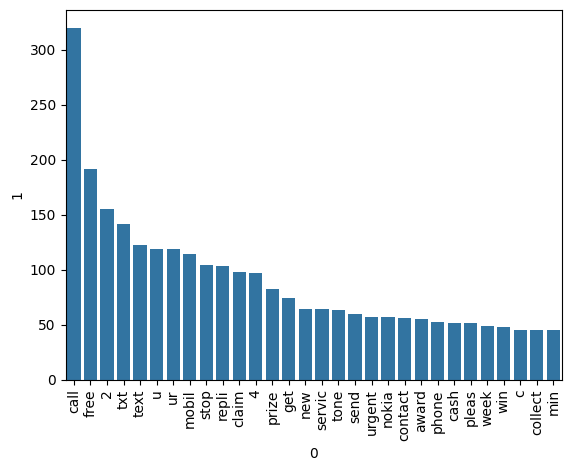

In [169]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [171]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)        

35404

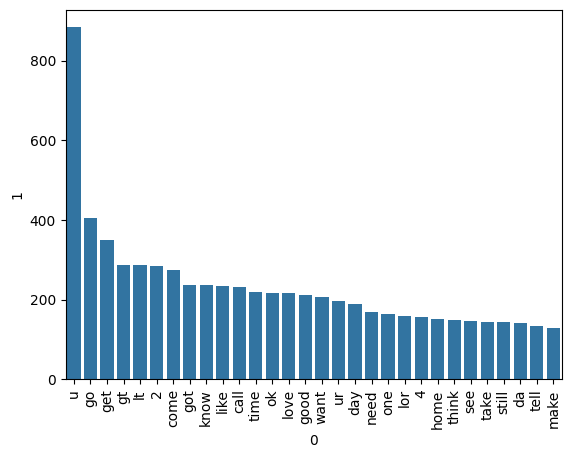

In [173]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [174]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model Development

In [175]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [178]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [179]:
y = df['target'].values

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [182]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [183]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [184]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [185]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


# tfidf --> MultinomialNB

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [189]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [199]:
clfs = {
    'Support_Vector' : svc,
    'KNeighbour' : knc, 
    'Naive_Bayes': mnb, 
    'Decision_Tree': dtc, 
    'Logistic_Regression': lrc, 
    'Random_Forest': rfc, 
    'AdaBoost': abc, 
}

In [200]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [201]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [213]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name,":")
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  Support_Vector :
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KNeighbour :
Accuracy -  0.9052224371373307
Precision -  1.0
For  Naive_Bayes :
Accuracy -  0.9709864603481625
Precision -  1.0
For  Decision_Tree :
Accuracy -  0.9284332688588007
Precision -  0.82
For  Logistic_Regression :
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  Random_Forest :
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost :
Accuracy -  0.960348162475822
Precision -  0.9292035398230089


In [212]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KNeighbour,0.905222,1.000000
2,Naive_Bayes,0.970986,1.000000
5,Random_Forest,0.975822,0.982906
0,Support_Vector,0.975822,0.974790
4,Logistic_Regression,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
3,Decision_Tree,0.929400,0.828283


In [206]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KNeighbour,Accuracy,0.905222
1,Naive_Bayes,Accuracy,0.970986
2,Random_Forest,Accuracy,0.975822
3,Support_Vector,Accuracy,0.975822
4,Logistic_Regression,Accuracy,0.958414
5,AdaBoost,Accuracy,0.960348
6,Decision_Tree,Accuracy,0.927466
7,KNeighbour,Precision,1.000000
8,Naive_Bayes,Precision,1.000000
9,Random_Forest,Precision,0.982906


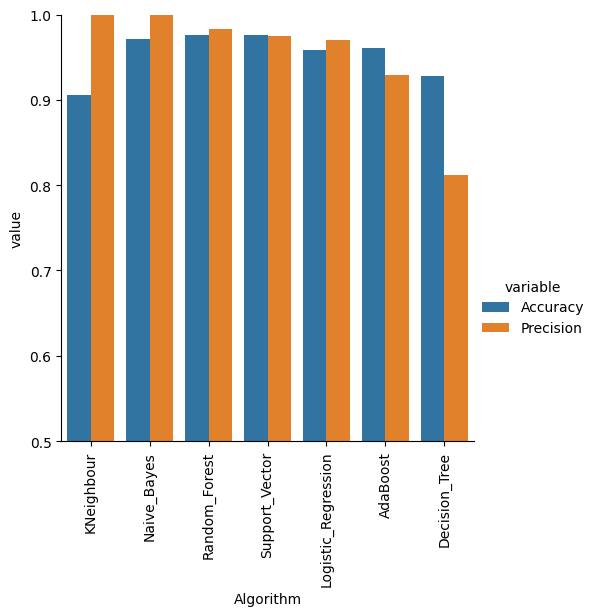

In [219]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Hence, there it is Naive_Bayes Algorithm our Winner with the BEST Overall Results!!